In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
############## COMPARE RADIAL DISTRIBUTION OF STANDARD DEVIATION  #############
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as mpyplot
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/pl/active/JKL_IDEAL/hurricanes/sst_26/"
WRF_DIRECTORY_28 = "/pl/active/JKL_IDEAL/hurricanes/sst_28/" 
WRF_DIRECTORY_30 = "/pl/active/JKL_IDEAL/hurricanes/sst_30/"  
WRF_DIRECTORY_32 = "/pl/active/JKL_IDEAL/hurricanes/sst_32/"  #"/rc_scratch/misa5952/hurricanes/nudge_sst_32/"   
WRF_DIRECTORY_34 = "/pl/active/JKL_IDEAL/hurricanes/sst_34/" #"/rc_scratch/misa5952/hurricanes/sst_34_NBA/"  

fileName = 'std_distr.txt'

dirFig = "/pl/active/JKL_IDEAL/hurricanes/Figures/"


In [3]:
#%% Turbine specs
z_hh = 90
D = 126

In [4]:
#%% Extract pdf for yaw misalignment
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',',skiprows=1)
binnss_26 = file_26[:,0]
hist_26 = file_26[:,1:]
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',',max_rows=1)
r_26 = file_26[:]

file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',',skiprows=1)
binnss_28 = file_28[:,0]
hist_28 = file_28[:,1:]
file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',',max_rows=1)
r_28 = file_28[:]

file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',',skiprows=1)
binnss_30 = file_30[:,0]
hist_30 = file_30[:,1:]
file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',',max_rows=1)
r_30 = file_30[:]

file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',',skiprows=1)
binnss_32 = file_32[:,0]
hist_32 = file_32[:,1:]
file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',',max_rows=1)
r_32 = file_32[:]

file_34 = np.loadtxt(WRF_DIRECTORY_34+fileName,delimiter=',',skiprows=1)
binnss_34 = file_34[:,0]
hist_34 = file_34[:,1:]
file_34 = np.loadtxt(WRF_DIRECTORY_34+fileName,delimiter=',',max_rows=1)
r_34 = file_34[:]

In [5]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_32 = 'tab:purple'
cols = [col_26,col_28,col_30,col_32,col_32]


In [6]:
#%% Eyewall for each case
r_eye_26 = 13805
r_eye_28 = 21300
r_eye_30 = 20333
r_eye_32 = 27055
r_eye_34 = 33638.915


In [7]:
#%% Find radial locations of interest
r_r = np.arange(0.8,1.3,0.1)

i_r_26 = np.zeros(len(r_r))
i_r_28 = np.zeros(len(r_r))
i_r_30 = np.zeros(len(r_r))
i_r_32 = np.zeros(len(r_r))
i_r_34 = np.zeros(len(r_r))

for i in np.arange(len(r_r)):
    i_r_26[i] = np.argmin(np.abs(r_26/r_eye_26 - r_r[i]))
    i_r_28[i] = np.argmin(np.abs(r_28/r_eye_28 - r_r[i]))
    i_r_30[i] = np.argmin(np.abs(r_30/r_eye_30 - r_r[i]))
    i_r_32[i] = np.argmin(np.abs(r_32/r_eye_32 - r_r[i]))
    i_r_34[i] = np.argmin(np.abs(r_34/r_eye_34 - r_r[i]))

i_r_26 = i_r_26.astype('int')
i_r_28 = i_r_28.astype('int')
i_r_30 = i_r_30.astype('int')
i_r_32 = i_r_32.astype('int')
i_r_34 = i_r_34.astype('int')

## Current IEC profiles for 3-sec and 10-min winds

In [8]:
#%% Define functions to estiamte atmospheric conditions during extreme events (IEC models)

def EWM_turbulent(u_ref,u_hub,z_rotor,z_hub):
    # 10-min hub-height wind speed for 50-year and 1-year recurrence
    u_50 = u_ref*((z_rotor/z_hub)**0.11);
    u_1 = 0.8*u_50;
    # Turbulence standard deviation
    std = 0.11*u_hub
    return [u_50,u_1,std]

def EWM_steady(u_ref,z_rotor,z_hub):
    # 3-sec hub-height wind speed for 50-year and 1-year recurrence
    u_e50 = 1.4*u_ref*((z_rotor/z_hub)**0.11);
    u_e1 = 0.8*u_e50;
    return [u_e50,u_e1]

def NTM(u_hub,i_ref):
    b = 5.6
    # Standard deviation of streamwise wind
    std = i_ref*(0.75*u_hub + b)
    return std

# Reference conditions for turbine class
I_ref = 0.16 # Class A turbine
U_ref = np.array([50]) # Class I turbine


z_TL = np.linspace(10,250,20)
i_z_IEC = np.argmin(np.abs(z_TL - z_hh))

## 6.1a
# EWM turbulent wind model
# U_hub = 0.95*U_ref
U_hub = 0.95*U_ref
U_50_61a,U_1_61a,STD_61a = EWM_turbulent(U_ref,U_hub,z_TL,z_hh)
print('10-min extreme wind speed is %f (%f) for 50-year and 1-year recurrence' % (U_50_61a[i_z_IEC],U_1_61a[i_z_IEC]))
print('Turbulence standard deviation is %f' % (STD_61a))

## 6.1b
# EWM steady wind model
# U_hub = U_e50
U_e50_61b,U_e1_61b = EWM_steady(U_ref,z_TL,z_hh)
print('3-sec extreme wind speed is %f (%f) for 50-year and 1-year recurrence' % (U_e50_61b[i_z_IEC],U_e1_61b[i_z_IEC]))

## 6.4
# Normal turbulence model
# U_hub < 0.7*U_ref
U_hub = 0.7*U_ref
STD_64 = NTM(U_hub,I_ref)
print('Turbulence standard deviation is %f' % (STD_64))




10-min extreme wind speed is 49.737170 (39.789736) for 50-year and 1-year recurrence
Turbulence standard deviation is 5.225000
3-sec extreme wind speed is 69.632038 (55.705630) for 50-year and 1-year recurrence
Turbulence standard deviation is 5.096000


In [9]:
U_ref_T = np.array([57]) # Class T turbine
U_ref_I = np.array([50]) # Class I turbine

I_ref = 0.18 # Class A turbine


## Class I
print('Class IA turbine')
# EWM turbulent wind model
U_hub_I = 0.95*U_ref_I
U_50_classI,U_1_classI,STD_classI = EWM_turbulent(U_ref_I,U_hub_I,z_TL,z_hh)
print('10-min extreme wind speed is %f (%f) for 50-year (1-year) recurrence' % (U_50_classI[i_z_IEC],U_1_classI[i_z_IEC]))
# EWM steady wind model
U_e50_classI,U_e1_classI = EWM_steady(U_ref_I,z_TL,z_hh)

U_hub = 0.7*U_ref_I
STD_classI = NTM(U_hub,I_ref)
print('Turbulence standard deviation is %f' % (STD_classI))
print('3-sec extreme wind speed is %f (%f) for 50-year (1-year) recurrence' % (U_e50_classI[i_z_IEC],U_e1_classI[i_z_IEC]))
print('  ')

## Class T
print('Class TA turbine')
# EWM turbulent wind model
U_hub_T = 0.95*U_ref_T
U_50_classT,U_1_classT,STD_classT = EWM_turbulent(U_ref_T,U_hub_T,z_TL,z_hh)
print('10-min extreme wind speed is %f (%f) for 50-year (1-year) recurrence' % (U_50_classT[i_z_IEC],U_1_classT[i_z_IEC]))
# EWM steady wind model
U_e50_classT,U_e1_classT = EWM_steady(U_ref_T,z_TL,z_hh)
U_hub = 0.7*U_ref_T
STD_classT = NTM(U_hub,I_ref)
print('Turbulence standard deviation is %f' % (STD_classT))
print('3-sec extreme wind speed is %f (%f) for 50-year (1-year) recurrence' % (U_e50_classT[i_z_IEC],U_e1_classT[i_z_IEC]))


Class IA turbine
10-min extreme wind speed is 49.737170 (39.789736) for 50-year (1-year) recurrence
Turbulence standard deviation is 5.733000
3-sec extreme wind speed is 69.632038 (55.705630) for 50-year (1-year) recurrence
  
Class TA turbine
10-min extreme wind speed is 56.700374 (45.360299) for 50-year (1-year) recurrence
Turbulence standard deviation is 6.394500
3-sec extreme wind speed is 79.380523 (63.504418) for 50-year (1-year) recurrence


## Compare IEC and hurricane data

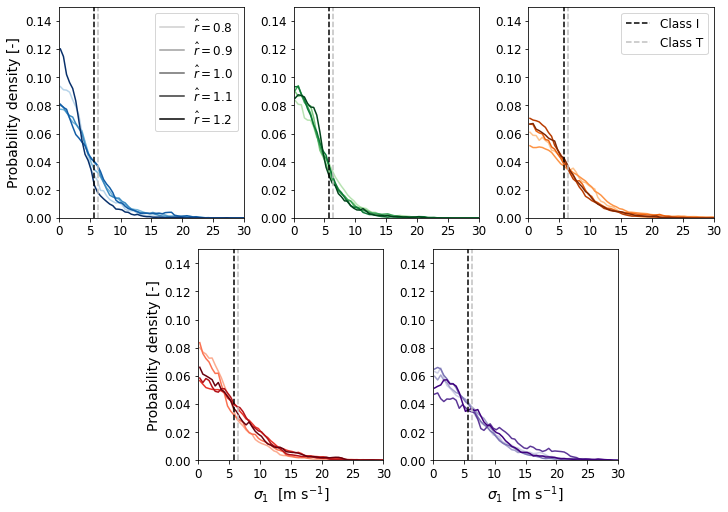

In [10]:
#%% Figure showing yaw misalignment histogram at different radial locations for each hurricane

limX = [0,30]
limY = [0,0.15]

import matplotlib.gridspec as gridspec

fig3 = mpyplot.figure(figsize=(10,7),constrained_layout=True)
gs = fig3.add_gridspec(2, 6)

f3_ax1 = fig3.add_subplot(gs[0, 0:2])
colores = mpyplot.cm.Blues(np.linspace(0.3,1,len(r_r)))
colores_legend = mpyplot.cm.Greys(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_26,hist_26[:,i_r_26[i_r]],color=colores[i_r])
    # For legend
    mpyplot.plot(-1*binnss_26,-1*hist_26[:,i_r_26[i_r]],color=colores_legend[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
# STD from urbulence model
mpyplot.plot([STD_classI,STD_classI],limY,'--k',linewidth=1.5)
mpyplot.plot([STD_classT,STD_classT],limY,'--',color='silver',linewidth=1.5)
mpyplot.legend(fontsize=12)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
# mpyplot.xlabel(r'$\sigma_1$  [m s$^{-1}$]',fontsize=14)
mpyplot.ylabel('Probability density [-]',fontsize=14)

f3_ax1 = fig3.add_subplot(gs[0, 2:4])
colores = mpyplot.cm.Greens(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_28,hist_28[:,i_r_28[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
mpyplot.plot([STD_classI,STD_classI],limY,'--k',linewidth=1.5)
mpyplot.plot([STD_classT,STD_classT],limY,'--',color='silver',linewidth=1.5)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
# mpyplot.xlabel(r'$\sigma_1$  [m s$^{-1}$]',fontsize=14)
# mpyplot.ylabel('Probability density [-]',fontsize=14)

f3_ax1 = fig3.add_subplot(gs[0, 4:6])
colores = mpyplot.cm.Oranges(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_30,hist_30[:,i_r_30[i_r]],color=colores[i_r])
# STD from urbulence model
mpyplot.plot([STD_classI,STD_classI],limY,'--k',linewidth=1.5,label='Class I')
mpyplot.plot([STD_classT,STD_classT],limY,'--',color='silver',linewidth=1.5,label='Class T')
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
mpyplot.legend(fontsize=12)
# mpyplot.xlabel(r'$\sigma_1$  [m s$^{-1}$]',fontsize=14)
# mpyplot.ylabel('Probability density [-]',fontsize=14)

f3_ax1 = fig3.add_subplot(gs[1, 1:3])
colores = mpyplot.cm.Reds(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_32,hist_32[:,i_r_32[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
# STD from urbulence model
mpyplot.plot([STD_classI,STD_classI],limY,'--k',linewidth=1.5)
mpyplot.plot([STD_classT,STD_classT],limY,'--',color='silver',linewidth=1.5)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
mpyplot.xlabel(r'$\sigma_1$  [m s$^{-1}$]',fontsize=14)
mpyplot.ylabel('Probability density [-]',fontsize=14)

f3_ax1 = fig3.add_subplot(gs[1, 3:5])
colores = mpyplot.cm.Purples(np.linspace(0.3,1,len(r_r)))
for i_r in np.arange(len(r_r)):
    mpyplot.plot(binnss_34,hist_34[:,i_r_34[i_r]],color=colores[i_r],label=r'$\hat{r} = $'+str(r_r[i_r]))
# STD from urbulence model
mpyplot.plot([STD_classI,STD_classI],limY,'--k',linewidth=1.5)
mpyplot.plot([STD_classT,STD_classT],limY,'--',color='silver',linewidth=1.5)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(limX)
mpyplot.ylim(limY)
mpyplot.xlabel(r'$\sigma_1$  [m s$^{-1}$]',fontsize=14)
# mpyplot.ylabel('Probability density [-]',fontsize=14)

mpyplot.savefig(dirFig + "std_prob.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')
# mpyplot.tight_layout()
mpyplot.show()

In [11]:
# Percent of cases that exceed model

temp_26 = 0
for i_r in np.arange(len(r_r)):
    temp_26 += np.nansum(hist_26[binnss_26>STD_classT,i_r_26[i_r]])
temp_26 = temp_26/len(r_r)
print(temp_26)

temp_28 = 0
for i_r in np.arange(len(r_r)):
    temp_28 += np.nansum(hist_28[binnss_28>STD_classT,i_r_28[i_r]])
temp_28 = temp_28/len(r_r)
print(temp_28)

temp_30 = 0
for i_r in np.arange(len(r_r)):
    temp_30 += np.nansum(hist_30[binnss_30>STD_classT,i_r_30[i_r]])
temp_30 = temp_30/len(r_r)
print(temp_30)

temp_32 = 0
for i_r in np.arange(len(r_r)):
    temp_32 += np.nansum(hist_32[binnss_32>STD_classT,i_r_32[i_r]])
temp_32 = temp_32/len(r_r)
print(temp_32)

temp_34 = 0
for i_r in np.arange(len(r_r)):
    temp_34 += np.nansum(hist_34[binnss_34>STD_classT,i_r_34[i_r]])
temp_34 = temp_34/len(r_r)
print(temp_34)

0.1885923561612864
0.16701785522973006
0.3177260714718049
0.3098601360083739
0.36713951880076423


In [12]:
# 95th percentile of distributions

# Function that finds bin for ith percentile
def fun_perc(binss,pdf,ith):
    summ =  0
    bin_perc = binss[0]
    for i in np.flip(np.arange(len(pdf))):
        if summ<ith:
            summ += pdf[i]
            bin_perc = binss[i]
    return bin_perc

print(fun_perc(binnss_34,hist_34[:,i_r_34[-1]],0.05))
            


14.75


In [13]:
# Find mean bin for i-th percentile
iith = 1-0.95

temp_26 = 0
for i_r in np.arange(len(r_r)):
    temp_26 += fun_perc(binnss_26,hist_26[:,i_r_26[i_r]],iith)
temp_26 = temp_26/len(r_r)
print(temp_26)

temp_28 = 0
for i_r in np.arange(len(r_r)):
    temp_28 += fun_perc(binnss_28,hist_28[:,i_r_28[i_r]],iith)
temp_28 = temp_28/len(r_r)
print(temp_28)

temp_30 = 0
for i_r in np.arange(len(r_r)):
    temp_30 += fun_perc(binnss_30,hist_30[:,i_r_30[i_r]],iith)
temp_30 = temp_30/len(r_r)
print(temp_30)

temp_32 = 0
for i_r in np.arange(len(r_r)):
    temp_32 += fun_perc(binnss_32,hist_32[:,i_r_32[i_r]],iith)
temp_32 = temp_32/len(r_r)
print(temp_32)

temp_34 = 0
for i_r in np.arange(len(r_r)):
    temp_34 += fun_perc(binnss_34,hist_34[:,i_r_34[i_r]],iith)
temp_34 = temp_34/len(r_r)
print(temp_34)

11.15
10.25
13.85
13.85
15.45


In [14]:
# Find mean bin for i-th percentile
iith = 0.5 #1-0.95

temp_26 = 0
for i_r in np.arange(len(r_r)):
    if r_r[i_r] == 1.0:
        temp_26 += fun_perc(binnss_26,hist_26[:,i_r_26[i_r]],iith)
# temp_26 = temp_26/len(r_r)
print(temp_26)

temp_28 = 0
for i_r in np.arange(len(r_r)):
    if r_r[i_r] == 1.0:
        temp_28 += fun_perc(binnss_28,hist_28[:,i_r_28[i_r]],iith)
# temp_28 = temp_28/len(r_r)
print(temp_28)

temp_30 = 0
for i_r in np.arange(len(r_r)):
    if r_r[i_r] == 1.2:
        temp_30 += fun_perc(binnss_30,hist_30[:,i_r_30[i_r]],iith)
# temp_30 = temp_30/len(r_r)
print(temp_30)

temp_32 = 0
for i_r in np.arange(len(r_r)):
    if r_r[i_r] == 1.0:
        temp_32 += fun_perc(binnss_32,hist_32[:,i_r_32[i_r]],iith)
# temp_32 = temp_32/len(r_r)
print(temp_32)

temp_34 = 0
for i_r in np.arange(len(r_r)):
    if r_r[i_r] == 1.1:
        temp_34 += fun_perc(binnss_34,hist_34[:,i_r_34[i_r]],iith)
# temp_34 = temp_34/len(r_r)
print(temp_34)

3.25
2.75
4.25
4.75
5.75


In [15]:
STD_classI

array([5.733])

In [16]:
STD_classT

array([6.3945])